In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filePath = "./Speed_Dating_Data.csv" 
df = pd.read_csv(filePath)
df.iid = df.iid.astype(float)
df.pid = df.pid.astype(float)

FIGURE_SIZE = (15, 8)

# TODO: Intro
asdf intro stuff asdf (explain matches, attractiveness, etc.)

## Question: Are matches more common for people with similar attractivenesses?
asdf explain methodology and question and stuff asdf explain what we do below asdf

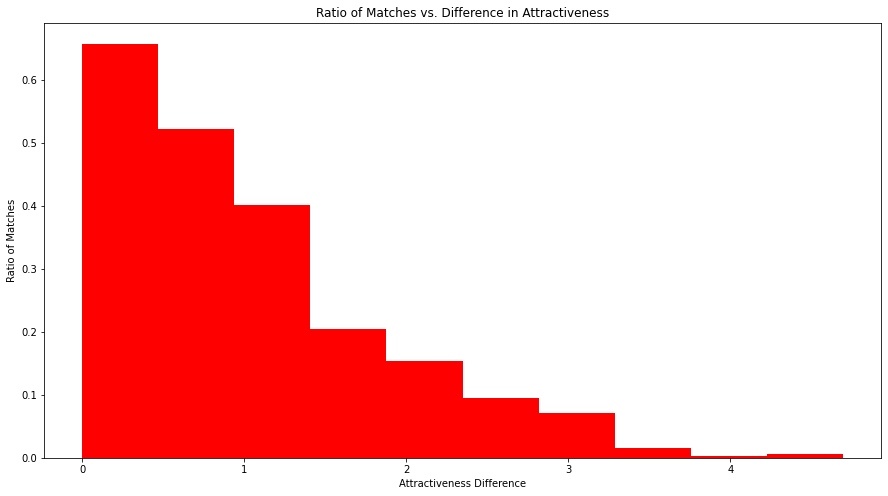

In [2]:
iids = pd.unique(df.iid)

# Assigns every unique person (by their iid) an attractiveness score based on the average of what their partners rated them
personToAttractiveness = {}
for subjectOfInterest in iids:
    attractiveness = statistics.mean(df[(df.iid == subjectOfInterest) & (df.attr_o.notna())].attr_o)
    personToAttractiveness[subjectOfInterest] = attractiveness

# Constructs a dictionary of pairs (tuple of iid and pid) to whether they matched
pairToDidMatch = {}
rowsWithPairs = df[df.iid.notna() & df.pid.notna()]
for iid in iids:
    for pid in rowsWithPairs[rowsWithPairs.iid == iid].pid:
        if (pid, iid) in pairToDidMatch:
            # Asserts that if person A matches with person B, then person B has also matched with person A
            assert rowsWithPairs[(rowsWithPairs.iid == iid) & (rowsWithPairs.pid == pid)].iloc[0].match == pairToDidMatch[(pid, iid)]
            continue
        pairToDidMatch[(iid, pid)] = rowsWithPairs[(rowsWithPairs.iid == iid) & (rowsWithPairs.pid == pid)].iloc[0].match
        
# Gets all the differences of attractivenesses between people of all pairings and also collects whether the pair matched
attractivenessDifferences = [abs(personToAttractiveness[pair[0]] - personToAttractiveness[pair[1]]) for pair in pairToDidMatch.keys()]
correspondingDidMatch = list(pairToDidMatch.values())

# Gets the attractivness difference of people who matched
attractivenessDifferencesOfMatchers = []
for i in range(len(correspondingDidMatch)):
    if correspondingDidMatch[i] == 0:
        continue
    attractivenessDifferencesOfMatchers.append(attractivenessDifferences[i])

# Plots a density histogram of people who matched where the bins are of their attractiveness difference
plt.figure(figsize=FIGURE_SIZE)
plt.hist(attractivenessDifferencesOfMatchers, density=True, color="red")
plt.title("Ratio of Matches vs. Difference in Attractiveness")
plt.xlabel("Attractiveness Difference")
plt.ylabel("Ratio of Matches")
plt.show()

### Analysis
TODO: explain the above data/chart

## Question: Do attractive people match more?
asdf explain methodology and question and stuff asdf

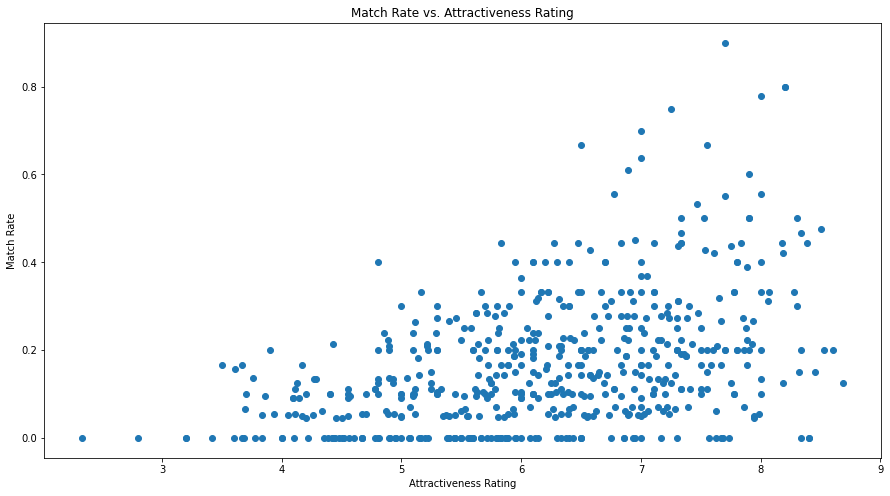

In [3]:
# Gets a list of attractivenesses of all people and calculates the proportion of matches they made
attractivenesses = list(personToAttractiveness.values())
correspondingMatchRate = []
for subjectOfInterest in iids:
    rowsOfPerson = df[(df.iid == subjectOfInterest) & (df.pid.notna())]
    matchSuccessRate = len(rowsOfPerson[rowsOfPerson.match == 1]) / len(rowsOfPerson)
    correspondingMatchRate.append(matchSuccessRate)

# Linear regression commented out because it is done below and it detracts from this plot
#linearRegressionCoefficients = np.polyfit(attractivenesses, correspondingMatchRate, 1)
#lineFunction = np.poly1d(linearRegressionCoefficients)

# Plots a scatter plot of attractiveness rating and match rate with the corresponding linear regression
plt.figure(figsize=FIGURE_SIZE)
#plt.plot(attractivenesses, correspondingMatchRate, "o", attractivenesses, lineFunction(attractivenesses), "-")
plt.plot(attractivenesses, correspondingMatchRate, "o")
plt.title("Match Rate vs. Attractiveness Rating")
plt.xlabel("Attractiveness Rating")
plt.ylabel("Match Rate")
plt.show()

# Prints the linear regression equation
#print("Linear Regression Equation: y = {:10.5f}x + {:10.5f}.".format(*linearRegressionCoefficients))

### Analysis
TODO: explain the above data/chart and then explain why trying binning below.

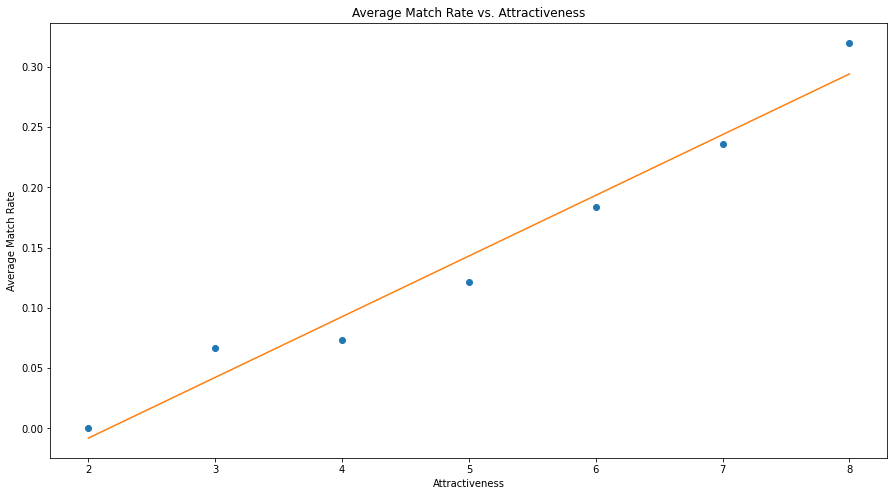

Linear Regression Equation: y =    0.05035x +   -0.10867.


In [4]:
# Maps an attractiveness bin (all atractivenesses that are in the same 'group') to a list of match rates
bins = range(1, 11)
binToMatchRates = {binValue: [] for binValue in bins}
for i in range(len(attractivenesses)):
    attractiveness = attractivenesses[i]
    binValue = int(attractiveness)
    binToMatchRates[binValue].append(correspondingMatchRate[i])
    
# Removes empty values from the dictionary
for binValue in bins:
    if len(binToMatchRates[binValue]) == 0:
        del binToMatchRates[binValue]
        
# Linear regression
x = list(binToMatchRates.keys())
y = [statistics.mean(matchRates) for matchRates in list(binToMatchRates.values())]
linearRegressionCoefficients = np.polyfit(x, y, 1)
lineFunction = np.poly1d(linearRegressionCoefficients)
    
# Plots the average match rate for each attractiveness bin
plt.figure(figsize=FIGURE_SIZE)
plt.plot(x, y, "o", x, lineFunction(x), "-")
plt.title("Average Match Rate vs. Attractiveness")
plt.xlabel("Attractiveness")
plt.ylabel("Average Match Rate")
plt.show()

# Prints the linear regression equation
print("Linear Regression Equation: y = {:10.5f}x + {:10.5f}.".format(*linearRegressionCoefficients))

### Analysis
TODO: explain the above data/chart and whether it is different from the first scatter plot.

## Question: TODO:
asdf

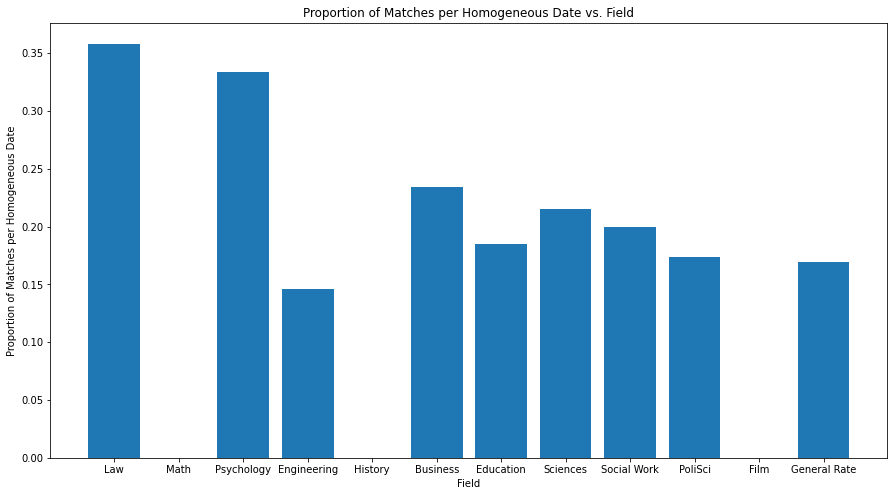

In [5]:
# Creates a mapping of iid to profession
individualToProfession = {iid: None for iid in iids}
for iid in iids:
    relevantRow = df[(df.iid == iid) & (df.field_cd.notna())]
    if len(relevantRow) != 0:
        individualToProfession[iid] = relevantRow.iloc[0].field_cd

# Deletes bad entries from the individualToProfession dictionary
for iid in list(individualToProfession.keys()):
    if individualToProfession[iid] == None or individualToProfession[iid] == 18: # TODO: why is 18 being checked?
        del individualToProfession[iid]
        
# Goes through the pairs and checks whether they had the same profession (and if so, whether they matched)
# Instead of using a dictionary, a list is used because the profession numbers can be considered indices when shifted down by 1
# Homogeneous in this scenario means that both members of the pair have the same profession
professionToNumberOfHomogeneousDates = [0 for _ in range(17)]
professionToNumberOfHomogeneousMatches = [0 for _ in range(17)]
for pair in pairToDidMatch:
    if pair[0] not in individualToProfession or pair[1] not in individualToProfession:
        continue
    if individualToProfession[pair[0]] == individualToProfession[pair[1]]:
        profession = int(individualToProfession[pair[0]] - 1)
        professionToNumberOfHomogeneousMatches[profession] += pairToDidMatch[pair]
        professionToNumberOfHomogeneousDates[profession] += 1

titles = ['Law', 'Math', 'Psychology', 'Medical', 'Engineering', 'English', 'History', 'Business', 'Education', 'Sciences', 'Social Work', 'Undecided', 'PoliSci', 'Film', 'Arts', 'Languages', 'Architecture', 'General Rate']

# Maps each profession to the rate at which homogeneous matches were made
# No mappings are made for professions without homogeneous dates
professionToMatchRate = {
    i: professionToNumberOfHomogeneousMatches[i] / professionToNumberOfHomogeneousDates[i]
    for i in range(len(professionToNumberOfHomogeneousDates))
    if professionToNumberOfHomogeneousDates[i] != 0
}

# Calculates the general overall mean match rate
professionToMatchRate[17] = statistics.mean(correspondingMatchRate)

plt.figure(figsize=FIGURE_SIZE)
plt.bar([titles[i] for i in list(professionToMatchRate.keys())], list(professionToMatchRate.values()))
plt.title("Proportion of Matches per Homogeneous Date vs. Field")
plt.xlabel("Field")
plt.ylabel("Proportion of Matches per Homogeneous Date")
plt.show()